KNN is used for both classification and regression problems 
where we find the category of new input point based on distance from independent categories.


k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv('Classified Data',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


standardisation as we don't know which scale it is valued in.
 And KNN classifier predicts class of a given test observations that are nearest to it.That's why scale of the variables matters as it has impact on the distance.


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1)) #means other than target class taking all

StandardScaler()

In [10]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
# to give column naming as same as df except target class coz it's not here 
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred=knn.predict(x_test)

In [19]:
#Evaluation in our model
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
print(confusion_matrix(y_test,pred))

[[144  11]
 [ 11 134]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       155
           1       0.92      0.92      0.92       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



these are the results we got from k=1 so to improve this we need to find the error rate where we can get best result 

In [22]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
    # to append list where pred value does not match y value

Text(0, 0.5, 'Error Rate')

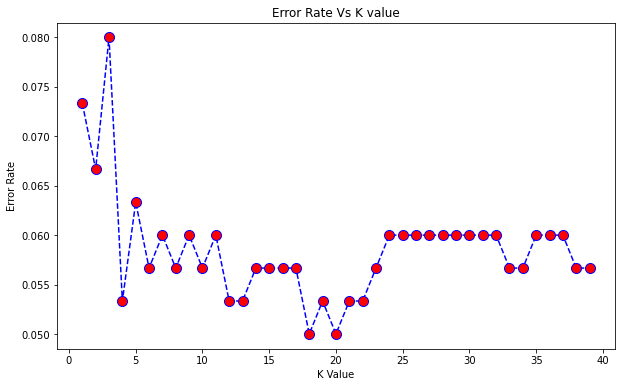

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [28]:
# AT K =20 gives us the best results
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
pred_final=knn.predict(x_test)

In [29]:
print('with k=20')
print('\n')
print(confusion_matrix(y_test,pred_final))
print('\n')
print(classification_report(y_test,pred_final))

with k=20


[[142  13]
 [  4 141]]


              precision    recall  f1-score   support

           0       0.97      0.92      0.94       155
           1       0.92      0.97      0.94       145

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300

